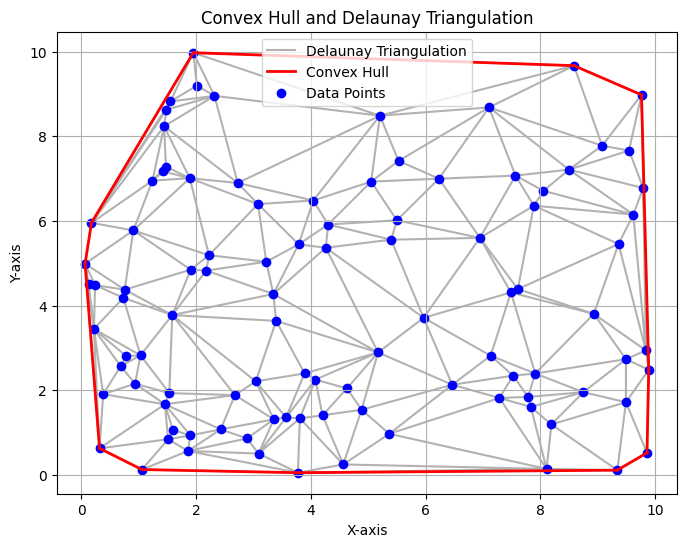

In [2]:
#a 

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, Delaunay

 
file = "mesh.dat"  
data = np.loadtxt(file, delimiter=' ', skiprows=1)

x, y = data[:, 0], data[:, 1]
points = np.column_stack((x, y))


hull = ConvexHull(points)

tri = Delaunay(points)

fig, ax = plt.subplots(figsize=(8, 6))

plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='gray', alpha=0.6, label="Delaunay Triangulation")

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-', linewidth=2, label="Convex Hull" if "Convex Hull" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(x, y, color='blue', marker='o', label="Data Points")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Convex Hull and Delaunay Triangulation")
plt.legend()
plt.grid(True)

plt.show()


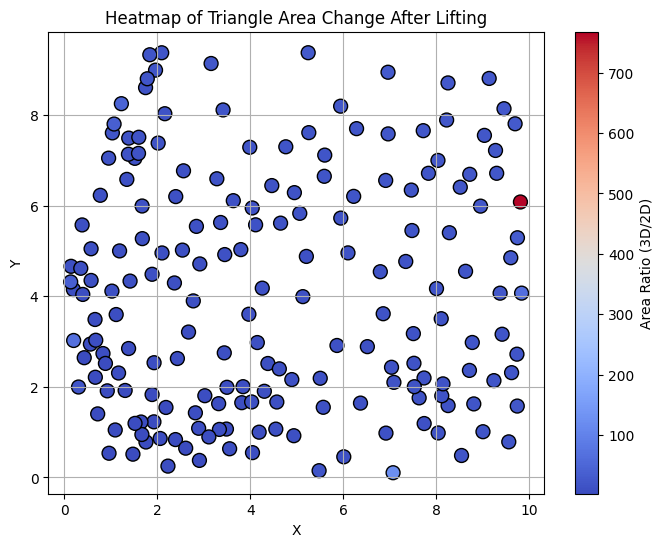

In [4]:
#b

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


def lifting_function(x, y):
    return x**2 + y**2


file = "mesh.dat"  
data = np.loadtxt(file, delimiter=' ', skiprows=1)

x, y = data[:, 0], data[:, 1]
points_2D = np.column_stack((x, y))

tri = Delaunay(points_2D)


z = lifting_function(x, y)
points_3D = np.column_stack((x, y, z))


def triangle_area(A, B, C):
    return 0.5 * abs((B[0] - A[0]) * (C[1] - A[1]) - (C[0] - A[0]) * (B[1] - A[1]))

def triangle_area_3D(A, B, C):
    AB = B - A
    AC = C - A
    cross_product = np.cross(AB, AC)
    return 0.5 * np.linalg.norm(cross_product)


area_ratios = []
centroids = []

for simplex in tri.simplices:
    A_2D, B_2D, C_2D = points_2D[simplex]
    A_3D, B_3D, C_3D = points_3D[simplex]

    area_2D = triangle_area(A_2D, B_2D, C_2D)
    area_3D = triangle_area_3D(A_3D, B_3D, C_3D)

    if area_2D > 0:  
        area_ratio = area_3D / area_2D
    else:
        area_ratio = 1  

    area_ratios.append(area_ratio)

    centroid_x = np.mean([A_2D[0], B_2D[0], C_2D[0]])
    centroid_y = np.mean([A_2D[1], B_2D[1], C_2D[1]])
    centroids.append([centroid_x, centroid_y])

centroids = np.array(centroids)
area_ratios = np.array(area_ratios)


plt.figure(figsize=(8, 6))
sc = plt.scatter(centroids[:, 0], centroids[:, 1], c=area_ratios, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(sc, label="Area Ratio (3D/2D)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Heatmap of Triangle Area Change After Lifting")
plt.grid(True)
plt.show()


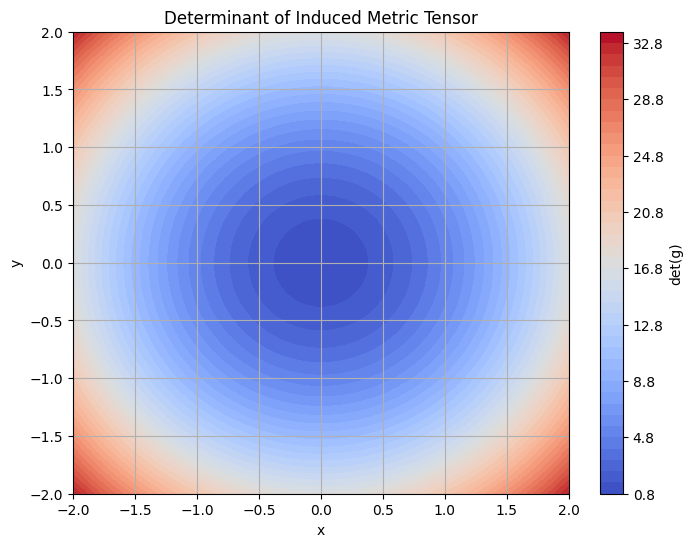

In [5]:
#c

import numpy as np
import matplotlib.pyplot as plt


def induced_metric(x, y):
    g_xx = 1 + 4*x**2
    g_yy = 1 + 4*y**2
    g_xy = 4*x*y
    return np.array([[g_xx, g_xy], [g_xy, g_yy]])


x_vals = np.linspace(-2, 2, 50)
y_vals = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x_vals, y_vals)

#compute determinant of metric tensor
det_g = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        g = induced_metric(X[i, j], Y[i, j])
        det_g[i, j] = np.linalg.det(g)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, det_g, levels=50, cmap='coolwarm')
plt.colorbar(label="det(g)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Determinant of Induced Metric Tensor")
plt.grid(True)
plt.show()


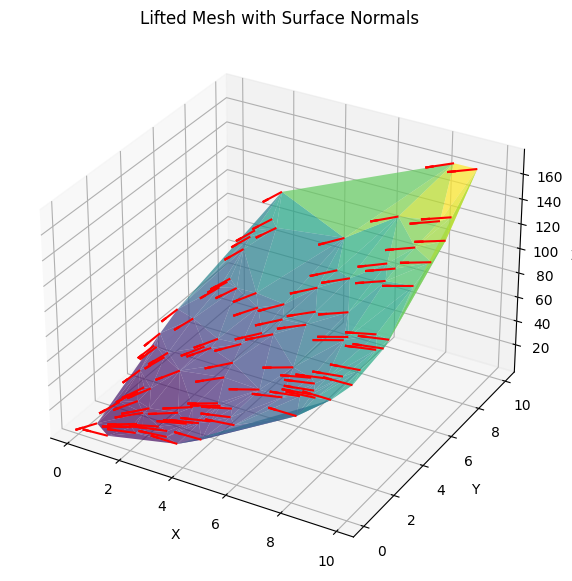

In [7]:
#d 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

def lifting_function(x, y):
    return x**2 + y**2


filename = "mesh.dat"  
data = np.loadtxt(filename, delimiter=' ', skiprows=1)


x, y = data[:, 0], data[:, 1]
z = lifting_function(x, y)

#compute Delaunay 2D
points_2D = np.column_stack((x, y))
tri = Delaunay(points_2D)

#computes normal vectors
def surface_normal(x, y):
    """Compute the unit normal vector at a given (x, y)"""
    N = np.array([-2*x, -2*y, 1])
    return N / np.linalg.norm(N)  # Normalize

normals = np.array([surface_normal(xi, yi) for xi, yi in zip(x, y)])

#plots the lifted mesh and normals
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap='viridis', alpha=0.7)
  
ax.quiver(x, y, z, normals[:, 0], normals[:, 1], normals[:, 2], color='red')


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lifted Mesh with Surface Normals")
plt.show()


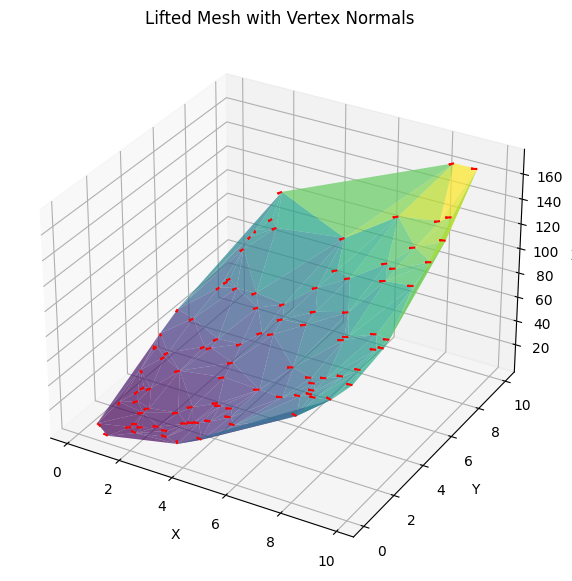

In [8]:
#e 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

def lifting_function(x, y):
    return x**2 + y**2


filename = "mesh.dat"  
data = np.loadtxt(filename, delimiter=' ', skiprows=1)

x, y = data[:, 0], data[:, 1]
z = lifting_function(x, y)

points_2D = np.column_stack((x, y))
tri = Delaunay(points_2D)
points_3D = np.column_stack((x, y, z))


def compute_face_normal(A, B, C):
    """Compute the normal of a triangle with vertices A, B, C"""
    AB = B - A
    AC = C - A
    normal = np.cross(AB, AC)
    return normal / np.linalg.norm(normal)  

#compute face normals
vertex_normals = np.zeros_like(points_3D)
face_areas = np.zeros(len(tri.simplices))

for i, simplex in enumerate(tri.simplices):
    A, B, C = points_3D[simplex]
    normal = compute_face_normal(A, B, C)
    
    
    area = 0.5 * np.linalg.norm(np.cross(B - A, C - A))
    face_areas[i] = area
    
    
    for j in simplex:
        vertex_normals[j] += normal * area


vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:, np.newaxis]


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap='viridis', alpha=0.7)


scaling = 0.2  
ax.quiver(x, y, z, vertex_normals[:, 0], vertex_normals[:, 1], vertex_normals[:, 2], length=scaling, color='red')


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lifted Mesh with Vertex Normals")
plt.show()


In [10]:
#f 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

def lifting_function(x, y):
    return x**2 + y**2

file = "mesh.dat"  
data = np.loadtxt(file, delimiter=' ', skiprows=1)


x, y = data[:, 0], data[:, 1]
z = lifting_function(x, y)


points_2D = np.column_stack((x, y))
tri = Delaunay(points_2D)
points_3D = np.column_stack((x, y, z))


def compute_face_normal(A, B, C):
    """Compute the normal of a triangle with vertices A, B, C"""
    AB = B - A
    AC = C - A
    normal = np.cross(AB, AC)
    return normal / np.linalg.norm(normal)  


vertex_normals = np.zeros_like(points_3D)
face_areas = np.zeros(len(tri.simplices))

for i, simplex in enumerate(tri.simplices):
    A, B, C = points_3D[simplex]
    normal = compute_face_normal(A, B, C)
    
    #computes triangle area
    area = 0.5 * np.linalg.norm(np.cross(B - A, C - A))
    face_areas[i] = area
    
    
    for j in simplex:
        vertex_normals[j] += normal * area


vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:, np.newaxis]

#computes the second fundamental form 
L = np.zeros(len(points_3D))
M = np.zeros(len(points_3D))
N = np.zeros(len(points_3D))

#Loop through each triangle 
for i, simplex in enumerate(tri.simplices):
    A, B, C = points_3D[simplex]
    normal_A = vertex_normals[simplex[0]]
    normal_B = vertex_normals[simplex[1]]
    normal_C = vertex_normals[simplex[2]]
    
    
    dNA = normal_B - normal_A
    dNB = normal_C - normal_B
    dNC = normal_A - normal_C
    
    # Approximating the second fundamental form 
    L[simplex[0]] += np.dot(dNA, np.array([1, 0]))  
    M[simplex[0]] += np.dot(dNA, np.array([0, 1]))  
    N[simplex[0]] += np.dot(dNA, np.array([1, 1]))  
    
    L[simplex[1]] += np.dot(dNB, np.array([1, 0]))
    M[simplex[1]] += np.dot(dNB, np.array([0, 1]))
    N[simplex[1]] += np.dot(dNB, np.array([1, 1]))
    
    L[simplex[2]] += np.dot(dNC, np.array([1, 0]))
    M[simplex[2]] += np.dot(dNC, np.array([0, 1]))
    N[simplex[2]] += np.dot(dNC, np.array([1, 1]))


L /= np.linalg.norm(L)
M /= np.linalg.norm(M)
N /= np.linalg.norm(N)

#plot the second fundamental form components as a heatmap
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for i, (title, data) in enumerate(zip(['L', 'M', 'N'], [L, M, N])):
    ax = axes[i]
    ax.contourf(x, y, data, levels=50, cmap='coolwarm')
    ax.set_title(f"Second Fundamental Form Component: {title}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(ax.contourf(x, y, data, levels=50, cmap='coolwarm'), ax=ax)

plt.tight_layout()
plt.show()


ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)